In [1]:
# Data as table
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


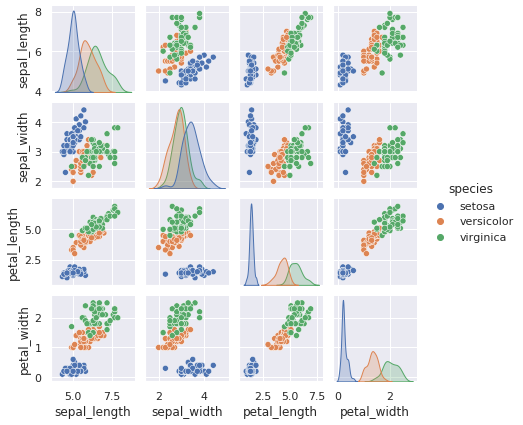

In [2]:
# Features matrix
# Visualizing the data
%matplotlib inline
import seaborn as sns; sns.set()
el = sns.pairplot(iris, hue='species', height=1.5);

el.savefig('rel.png')

In [3]:
# we will extract the features matrix and target array from the
# DataFrame
# features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
# target array
y_iris = iris['species']
y_iris.shape

(150,)

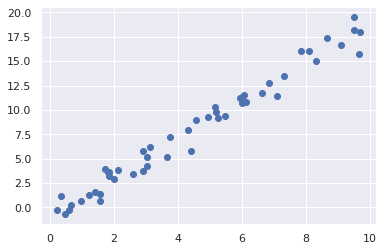

In [5]:
# Supervised learning example: Simple linear regression
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
# 1. Choose a class of model.
from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters.
# For our linear regression example, we can instantiate the LinearRegression
# class and specify that we would like to fit the intercept using the fit_inter
# cept hyperparameter
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [7]:
# 3. Arrange data into a features matrix and target vector.
X = x[:, np.newaxis]
X.shape

(50, 1)

In [8]:
# 4. Fit the model to your data.
model.fit(X, y)

LinearRegression()

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311164

In [11]:
# 5. Predict labels for unknown data.

In [12]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

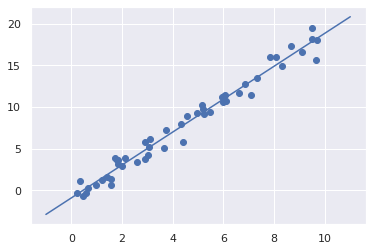

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [15]:
# Supervised learning example: Iris classification
# Gaussian naive Bayes
# Because it is so fast and has no hyperparameters to choose, Gaussian
# naive Bayes is often a good model to use as a baseline classification, before you
# explore whether improvements can be found through more sophisticated models.

# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [17]:
from sklearn.metrics import accuracy_score
# We can see the accuracy of our training which is 97%
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2.Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3.Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4.Transform the data to two dimensions

/home/aliensmart/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


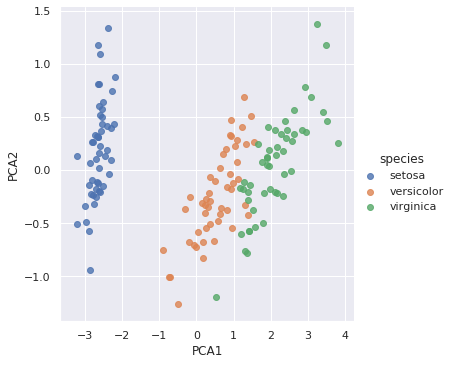

In [19]:
# Plotting the data
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [20]:
# Unsupervised learning: Iris clustering
from sklearn import mixture     # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3,
            covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)                   # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)       # 4. Determine cluster labels

/home/aliensmart/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


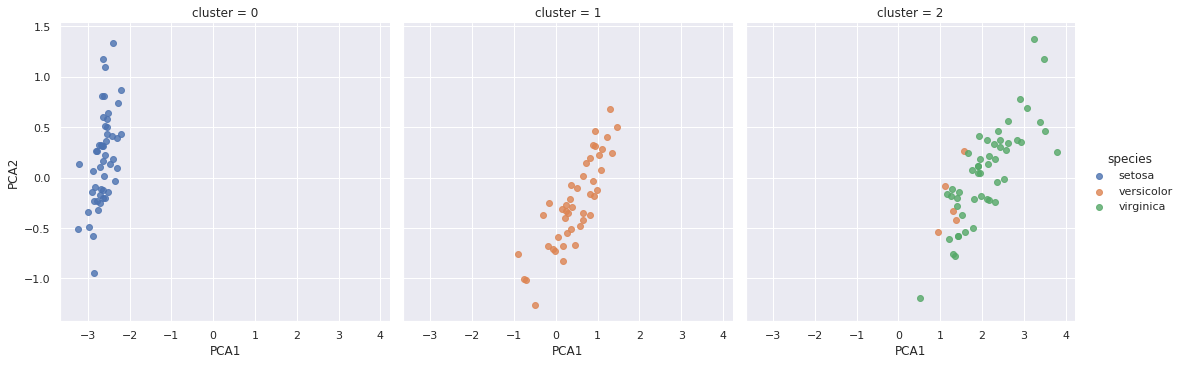

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

In [22]:
# Application: Exploring Handwritten Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

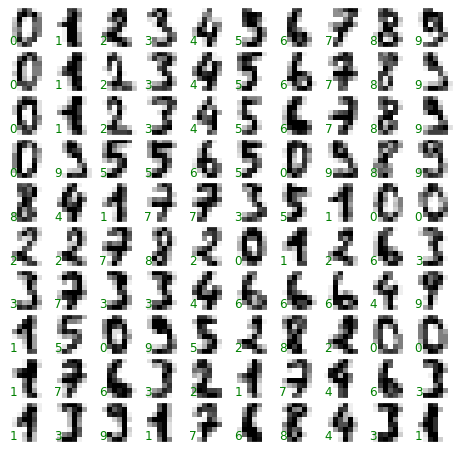

In [24]:
import matplotlib.pyplot as plt
# We are ploting 10 imgs in the columns and rows
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [25]:
# In order to work with this data within Scikit-Learn, we need a two-dimensional,
# [n_samples, n_features] representation
X = digits.data
X.shape

(1797, 64)

In [27]:
y = digits.target
y.shape

(1797,)

In [35]:
# Unsupervised learning: Dimensionality reduction
# manifold learning algorithm called Isomap
# and transform the data to two dimensions:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

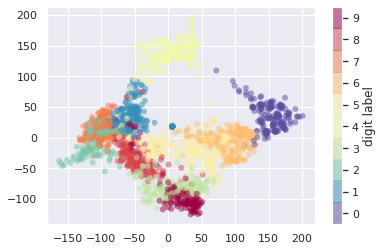

In [44]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);